# 1. Importing session

#### 1.1 Importing Libs

In [62]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

#%pip install imbalanced-learn
#%pip install scikit-learn

#%pip install xgboost
#%pip install catboost

#%pip install joblib

In [3]:
#base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# Regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



In [4]:
df = pd.read_csv("data_set.csv")

# 2.0 EDA

In [65]:
df.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16  HAS_FAM_INCOME     417

In [67]:
df.dtypes

VDRL_RESULT          float64
CONS_ALCOHOL         float64
RH_FACTOR            float64
SMOKER               float64
PLAN_PREGNANCY       float64
BLOOD_GROUP          float64
HAS_PREG_RISK        float64
TET_VACCINE          float64
IS_HEAD_FAMILY       float64
MARITAL_STATUS       float64
FOOD_INSECURITY      float64
NUM_ABORTIONS        float64
NUM_LIV_CHILDREN     float64
NUM_PREGNANCIES      float64
FAM_PLANNING         float64
TYPE_HOUSE           float64
HAS_FAM_INCOME       float64
LEVEL_SCHOOLING      float64
CONN_SEWER_NET       float64
NUM_RES_HOUSEHOLD    float64
HAS_FRU_TREE         float64
HAS_VEG_GARDEN       float64
FAM_INCOME           float64
HOUSING_STATUS       float64
WATER_TREATMENT      float64
AGE                  float64
dtype: object

In [68]:
df.isna().sum()

VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64

In [69]:
df.isnull().sum()

VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64

In [70]:
df["VDRL_RESULT"].value_counts()

VDRL_RESULT
1.0    40936
0.0      826
Name: count, dtype: int64

In [71]:
df["CONS_ALCOHOL"].value_counts()

CONS_ALCOHOL
1.0    36359
2.0     4140
0.0     1263
Name: count, dtype: int64

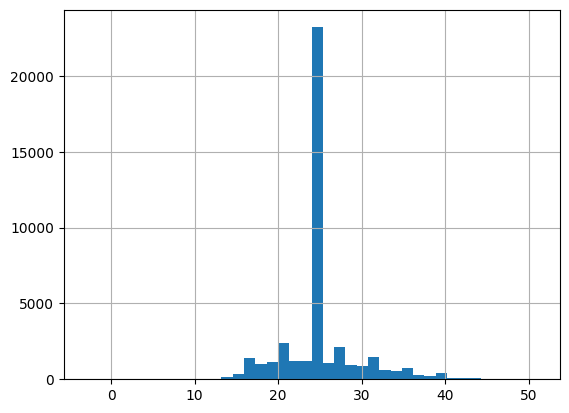

In [72]:
df["AGE"].hist(bins=40);

In [73]:
fig = px.box(df, y="AGE")
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'AGE=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': array([25., 25., 24., ..., 23., 25., 25.]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'AGE'}}}
})

In [74]:
'''
# Creating a subset for positive cases (people with syphilis)
df_positive = df[df['VDRL_RESULT'] == 1.0]

# Creating a subset for negative cases (people without syphilis)
df_negative = df[df['VDRL_RESULT'] == 0.0]

'''

"\n# Creating a subset for positive cases (people with syphilis)\ndf_positive = df[df['VDRL_RESULT'] == 1.0]\n\n# Creating a subset for negative cases (people without syphilis)\ndf_negative = df[df['VDRL_RESULT'] == 0.0]\n\n"

In [9]:
# Separate features and target variable
X = df.drop('VDRL_RESULT', axis=1)
y = df['VDRL_RESULT']

# Applying SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['VDRL_RESULT'] = y_resampled

# Displaying class distribution after SMOTE
print(df_balanced['VDRL_RESULT'].value_counts())

VDRL_RESULT
1.0    40936
0.0    40936
Name: count, dtype: int64


c:\Users\igor.sousa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\igor.sousa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\igor.sousa\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\igor.sousa\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executa

In [76]:
df_balanced.shape


(81872, 26)

In [77]:
corr_matrix = df.corr()

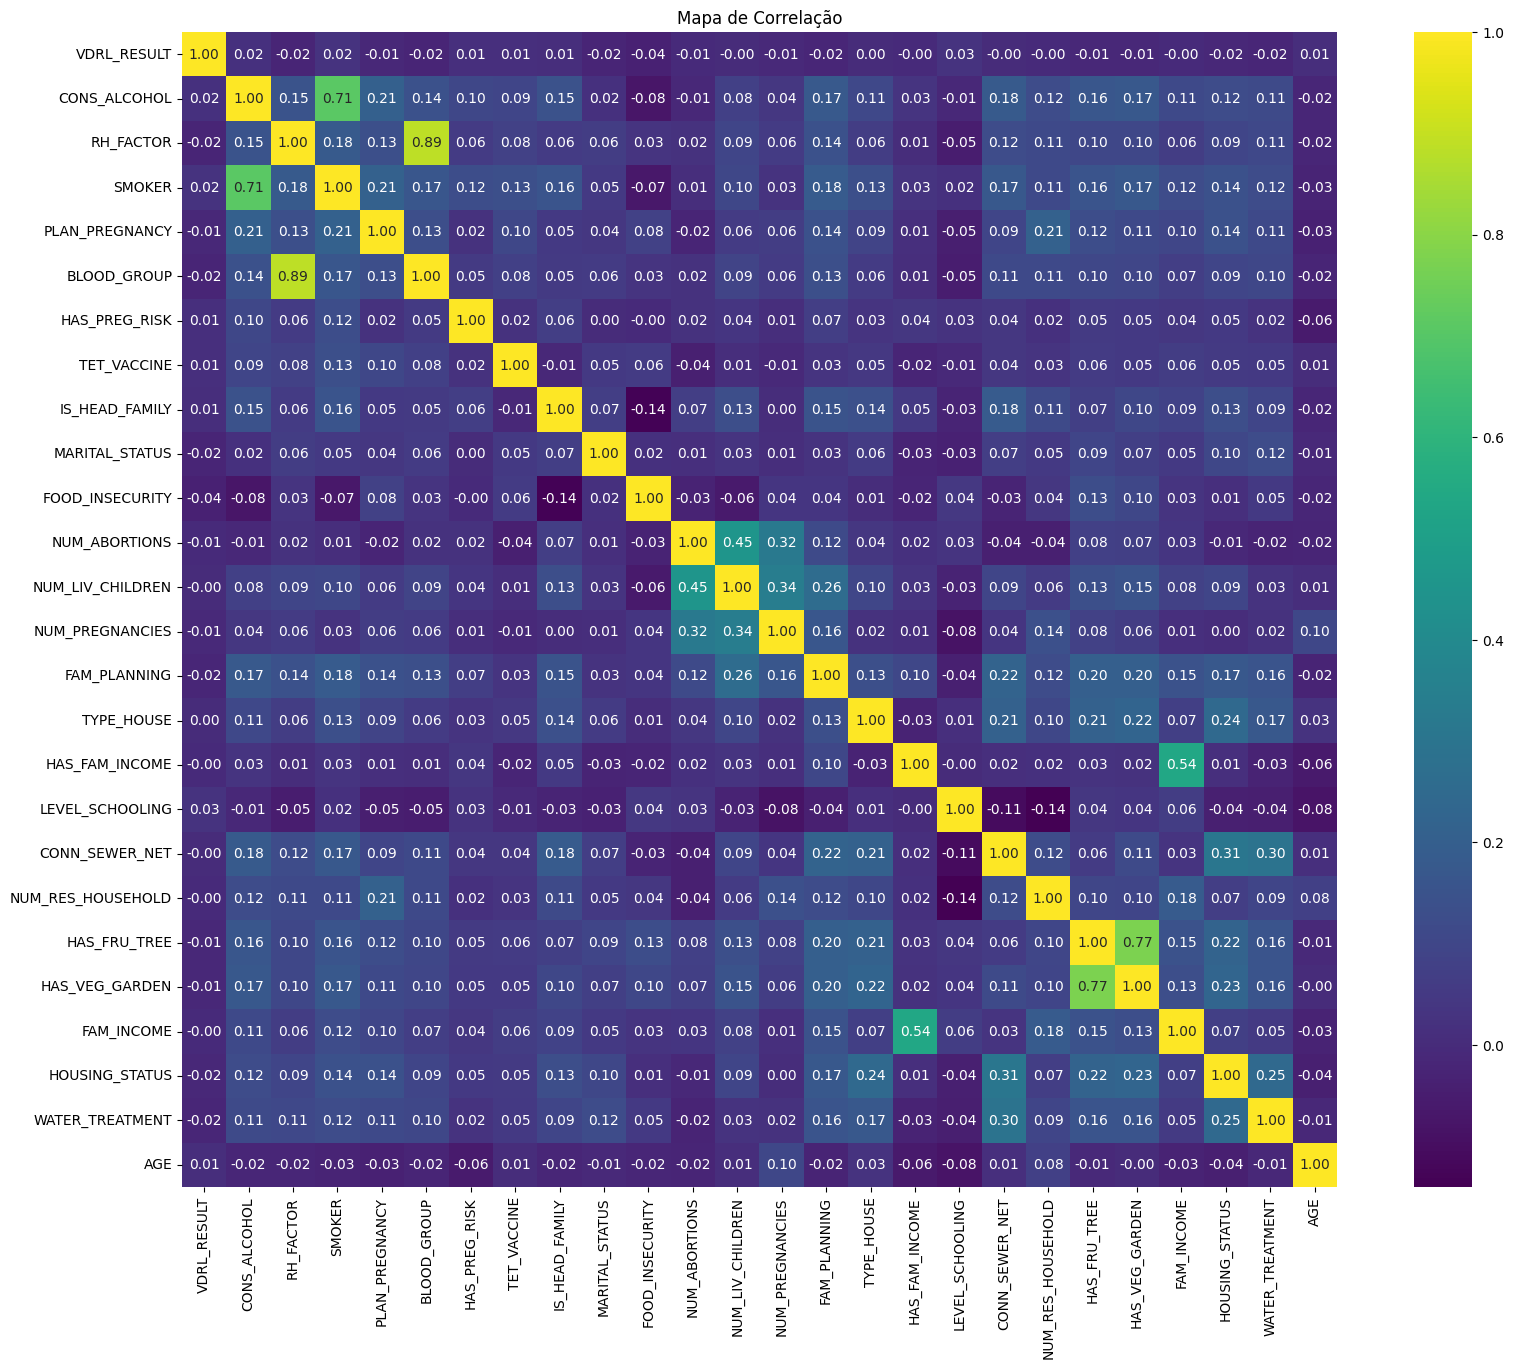

In [78]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Mapa de Correlação')
plt.show()

# 3.0 Classification

#### 3.1 dividing dataset

In [10]:
X = df_balanced.drop(columns=["VDRL_RESULT"])

y = df_balanced["VDRL_RESULT"]

In [11]:
print(y.head(2))
print("\n")

X.head(2)

0    1.0
1    1.0
Name: VDRL_RESULT, dtype: float64




,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.2 Training models

##### 3.2.1 Testing hiperparams

In [82]:
knn = KNeighborsClassifier()

rf = RandomForestClassifier(random_state=42)

dt =DecisionTreeClassifier(random_state=42)

lr = LogisticRegression(random_state=42)

xgb = XGBClassifier(random_state=42)

In [83]:
# Definindo os hiperparâmetros para variação
n_neighbors_list_knn = [1, 2, 3, 4, 5, 9, 11]
weights_list_knn = ["uniform", "distance"]

# Lista para armazenar resultados
results = []

def train_knn_models(X_train, y_train, X_test, y_test):
    for n_neighbors in n_neighbors_list_knn:
        for weight in weights_list_knn:
            # Cria o modelo KNN com os parâmetros específicos
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight)
            
            # Treina o modelo
            knn.fit(X_train, y_train)
            
            # Faz previsões no conjunto de teste
            y_pred = knn.predict(X_test)
            
            # Calcula as métricas
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            # Armazena os resultados
            results.append({
                "n_neighbors": n_neighbors,
                "weights": weight,
                "accuracy": accuracy
            })
            # Exibe as métricas para cada combinação de parâmetros
            print(f"Modelo com n_neighbors={n_neighbors}, weights={weight} -> "
                  f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return results

In [84]:
# Supondo que você tenha dividido seus dados em X_train, X_test, y_train, y_test
results_knn = train_knn_models(X_train, y_train, X_test, y_test)

Modelo com n_neighbors=1, weights=uniform -> Accuracy: 0.9520, F1 Score: 0.9519, Precision: 0.9559, Recall: 0.9520
Modelo com n_neighbors=1, weights=distance -> Accuracy: 0.9520, F1 Score: 0.9519, Precision: 0.9559, Recall: 0.9520
Modelo com n_neighbors=2, weights=uniform -> Accuracy: 0.9145, F1 Score: 0.9139, Precision: 0.9269, Recall: 0.9145
Modelo com n_neighbors=2, weights=distance -> Accuracy: 0.9520, F1 Score: 0.9519, Precision: 0.9560, Recall: 0.9520
Modelo com n_neighbors=3, weights=uniform -> Accuracy: 0.9204, F1 Score: 0.9199, Precision: 0.9311, Recall: 0.9204
Modelo com n_neighbors=3, weights=distance -> Accuracy: 0.9220, F1 Score: 0.9216, Precision: 0.9322, Recall: 0.9220
Modelo com n_neighbors=4, weights=uniform -> Accuracy: 0.8894, F1 Score: 0.8881, Precision: 0.9092, Recall: 0.8894
Modelo com n_neighbors=4, weights=distance -> Accuracy: 0.9245, F1 Score: 0.9241, Precision: 0.9341, Recall: 0.9245
Modelo com n_neighbors=5, weights=uniform -> Accuracy: 0.8992, F1 Score: 0.8

**The best KNN is n_neighbors=1 and weights=uniform**

In [85]:
# Definindo os hiperparâmetros para variação
n_estimators_list_rf = [50,100, 200, 300]
max_depth_list_rf = [None, 5, 10, 20]

# Lista para armazenar resultados
rf_results = []

def train_rf_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_rf:
        for max_depth in max_depth_list_rf:
            # Cria o modelo Random Forest com os parâmetros específicos
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            
            # Treina o modelo
            rf.fit(X_train, y_train)
            
            # Faz previsões no conjunto de teste
            y_pred = rf.predict(X_test)
            
            # Calcula as métricas
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            
            # Armazena os resultados
            rf_results.append({
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "accuracy": accuracy,
                "f1_score": f1,
                "precision": precision,
                "recall": recall
            })
            
            # Exibe as métricas para cada combinação de parâmetros
            print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth} -> "
                  f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return rf_results


In [86]:
# Supondo que você tenha dividido seus dados em X_train, X_test, y_train, y_test
rf_results = train_rf_models(X_train, y_train, X_test, y_test)

Modelo com n_estimators=50, max_depth=None -> Accuracy: 0.9899, F1 Score: 0.9899, Precision: 0.9900, Recall: 0.9899
Modelo com n_estimators=50, max_depth=5 -> Accuracy: 0.8922, F1 Score: 0.8922, Precision: 0.8922, Recall: 0.8922
Modelo com n_estimators=50, max_depth=10 -> Accuracy: 0.9781, F1 Score: 0.9781, Precision: 0.9784, Recall: 0.9781
Modelo com n_estimators=50, max_depth=20 -> Accuracy: 0.9897, F1 Score: 0.9897, Precision: 0.9899, Recall: 0.9897
Modelo com n_estimators=100, max_depth=None -> Accuracy: 0.9898, F1 Score: 0.9898, Precision: 0.9900, Recall: 0.9898
Modelo com n_estimators=100, max_depth=5 -> Accuracy: 0.8943, F1 Score: 0.8943, Precision: 0.8944, Recall: 0.8943
Modelo com n_estimators=100, max_depth=10 -> Accuracy: 0.9771, F1 Score: 0.9771, Precision: 0.9774, Recall: 0.9771
Modelo com n_estimators=100, max_depth=20 -> Accuracy: 0.9899, F1 Score: 0.9899, Precision: 0.9901, Recall: 0.9899
Modelo com n_estimators=200, max_depth=None -> Accuracy: 0.9897, F1 Score: 0.9897,

**The best Random Forest is n_estimators=50 and max_depth=None**

In [87]:
# Lista de valores para o hiperparâmetro max_depth
max_depth_list_dt = [None, 5 ,10, 20, 30, 50, 75, 100]

# Lista para armazenar os resultados
dt_results = []

def train_dt_models(X_train, y_train, X_test, y_test):
    for max_depth in max_depth_list_dt:
        # Cria o modelo Decision Tree com o parâmetro max_depth específico
        dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        
        # Treina o modelo
        dt.fit(X_train, y_train)
        
        # Faz previsões no conjunto de teste
        y_pred = dt.predict(X_test)
        
        # Calcula as métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        
        # Armazena os resultados
        dt_results.append({
            "max_depth": max_depth,
            "accuracy": accuracy,
            "f1_score": f1,
            "precision": precision,
            "recall": recall
        })
        
        # Exibe as métricas para cada valor de max_depth
        print(f"Modelo com max_depth={max_depth} -> "
              f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return dt_results


In [88]:
# Supondo que você tenha dividido seus dados em X_train, X_test, y_train, y_test
dt_results = train_dt_models(X_train, y_train, X_test, y_test)

Modelo com max_depth=None -> Accuracy: 0.9757, F1 Score: 0.9757, Precision: 0.9758, Recall: 0.9757
Modelo com max_depth=5 -> Accuracy: 0.8069, F1 Score: 0.8056, Precision: 0.8155, Recall: 0.8069
Modelo com max_depth=10 -> Accuracy: 0.8939, F1 Score: 0.8929, Precision: 0.9093, Recall: 0.8939
Modelo com max_depth=20 -> Accuracy: 0.9747, F1 Score: 0.9747, Precision: 0.9747, Recall: 0.9747
Modelo com max_depth=30 -> Accuracy: 0.9755, F1 Score: 0.9755, Precision: 0.9756, Recall: 0.9755
Modelo com max_depth=50 -> Accuracy: 0.9757, F1 Score: 0.9757, Precision: 0.9758, Recall: 0.9757
Modelo com max_depth=75 -> Accuracy: 0.9757, F1 Score: 0.9757, Precision: 0.9758, Recall: 0.9757
Modelo com max_depth=100 -> Accuracy: 0.9757, F1 Score: 0.9757, Precision: 0.9758, Recall: 0.9757


**The best Decision Tree is max_depth=50**

In [89]:
# Lista de valores para o hiperparâmetro C
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Lista para armazenar os resultados
lr_results = []

def train_lr_models(X_train, y_train, X_test, y_test):
    for C in C_values:
        # Cria o modelo Logistic Regression com o parâmetro C específico
        lr = LogisticRegression(C=C, random_state=42, max_iter=200, solver='liblinear') # 'liblinear' é compatível com L1 e L2
        
        # Treina o modelo
        lr.fit(X_train, y_train)
        
        # Faz previsões no conjunto de teste
        y_pred = lr.predict(X_test)
        
        # Calcula as métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        
        # Armazena os resultados
        lr_results.append({
            "C": C,
            "accuracy": accuracy,
            "f1_score": f1,
            "precision": precision,
            "recall": recall
        })
        
        # Exibe as métricas para cada valor de C
        print(f"Modelo com C={C} -> "
              f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return lr_results


In [90]:
# Supondo que você tenha dividido seus dados em X_train, X_test, y_train, y_test
lr_results = train_lr_models(X_train, y_train, X_test, y_test)


Modelo com C=0.001 -> Accuracy: 0.6150, F1 Score: 0.6149, Precision: 0.6151, Recall: 0.6150
Modelo com C=0.01 -> Accuracy: 0.6162, F1 Score: 0.6161, Precision: 0.6163, Recall: 0.6162
Modelo com C=0.1 -> Accuracy: 0.6162, F1 Score: 0.6161, Precision: 0.6164, Recall: 0.6162
Modelo com C=1 -> Accuracy: 0.6160, F1 Score: 0.6159, Precision: 0.6162, Recall: 0.6160
Modelo com C=10 -> Accuracy: 0.6159, F1 Score: 0.6158, Precision: 0.6161, Recall: 0.6159
Modelo com C=100 -> Accuracy: 0.6159, F1 Score: 0.6158, Precision: 0.6161, Recall: 0.6159
Modelo com C=1000 -> Accuracy: 0.6159, F1 Score: 0.6158, Precision: 0.6161, Recall: 0.6159


**The best Logic Regression is C=0.01**

In [91]:
# Definindo os hiperparâmetros para variação
n_estimators_list_xgb = [50, 300, 500]
max_depth_list_xgb = [6, 10, 20]
learning_rate_list_xgb = [0.1, 0.2, 0.5]

# Lista para armazenar os resultados
xgb_results = []

def train_xgb_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_xgb:
        for max_depth in max_depth_list_xgb:
            for learning_rate in learning_rate_list_xgb:
                # Cria o modelo XGBClassifier com os parâmetros específicos
                xgb = XGBClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                    random_state=42,
                    eval_metric='logloss'
                )
                
                # Treina o modelo
                xgb.fit(X_train, y_train)
                
                # Faz previsões no conjunto de teste
                y_pred = xgb.predict(X_test)
                
                # Calcula as métricas
                accuracy = accuracy_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred, average='weighted')
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                
                # Armazena os resultados
                xgb_results.append({
                    "n_estimators": n_estimators,
                    "max_depth": max_depth,
                    "learning_rate": learning_rate,
                    "accuracy": accuracy,
                    "f1_score": f1,
                    "precision": precision,
                    "recall": recall
                })
                
                # Exibe as métricas para cada combinação de parâmetros
                print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate} -> "
                      f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return xgb_results


In [92]:
# Supondo que você tenha dividido seus dados em X_train, X_test, y_train, y_test
xgb_results = train_xgb_models(X_train, y_train, X_test, y_test)

Modelo com n_estimators=50, max_depth=6, learning_rate=0.1 -> Accuracy: 0.9825, F1 Score: 0.9825, Precision: 0.9831, Recall: 0.9825
Modelo com n_estimators=50, max_depth=6, learning_rate=0.2 -> Accuracy: 0.9882, F1 Score: 0.9882, Precision: 0.9885, Recall: 0.9882
Modelo com n_estimators=50, max_depth=6, learning_rate=0.5 -> Accuracy: 0.9900, F1 Score: 0.9900, Precision: 0.9902, Recall: 0.9900
Modelo com n_estimators=50, max_depth=10, learning_rate=0.1 -> Accuracy: 0.9890, F1 Score: 0.9890, Precision: 0.9893, Recall: 0.9890
Modelo com n_estimators=50, max_depth=10, learning_rate=0.2 -> Accuracy: 0.9901, F1 Score: 0.9901, Precision: 0.9903, Recall: 0.9901
Modelo com n_estimators=50, max_depth=10, learning_rate=0.5 -> Accuracy: 0.9899, F1 Score: 0.9899, Precision: 0.9900, Recall: 0.9899
Modelo com n_estimators=50, max_depth=20, learning_rate=0.1 -> Accuracy: 0.9897, F1 Score: 0.9897, Precision: 0.9899, Recall: 0.9897
Modelo com n_estimators=50, max_depth=20, learning_rate=0.2 -> Accuracy:

**The best Xgboost is n_estimators=500, max_depth=20, learning_rate=0.1**

##### 3.2.2 Training the models with the best hiperparams

In [14]:
knn_best = KNeighborsClassifier(n_neighbors=1, weights="uniform").fit(X_train, y_train)


rf_best = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42).fit(X_train, y_train)


dt_best =DecisionTreeClassifier(max_depth=50, random_state=42).fit(X_train, y_train)


lr_best = LogisticRegression(C = 0.01, random_state=42).fit(X_train, y_train)


xgb_best = XGBClassifier(n_estimators = 500, max_depth = 20, learning_rate = 0.1, random_state=42).fit(X_train, y_train)


c:\Users\igor.sousa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 3.2.3 Evaluating models

In [15]:
def evaluate_classification(model, X_test, y_test):  
    
    pred = model.predict(X_test)
    
    print("Acurácia: ", accuracy_score(y_test, pred))
    print("Recall: ", recall_score(y_test, pred))
    print("Precisão: ", precision_score(y_test, pred))
    print("F1-Score: ", f1_score(y_test, pred))

In [16]:
def confusion_matrix_visualization(y_test, y_pred):

    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g") 
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

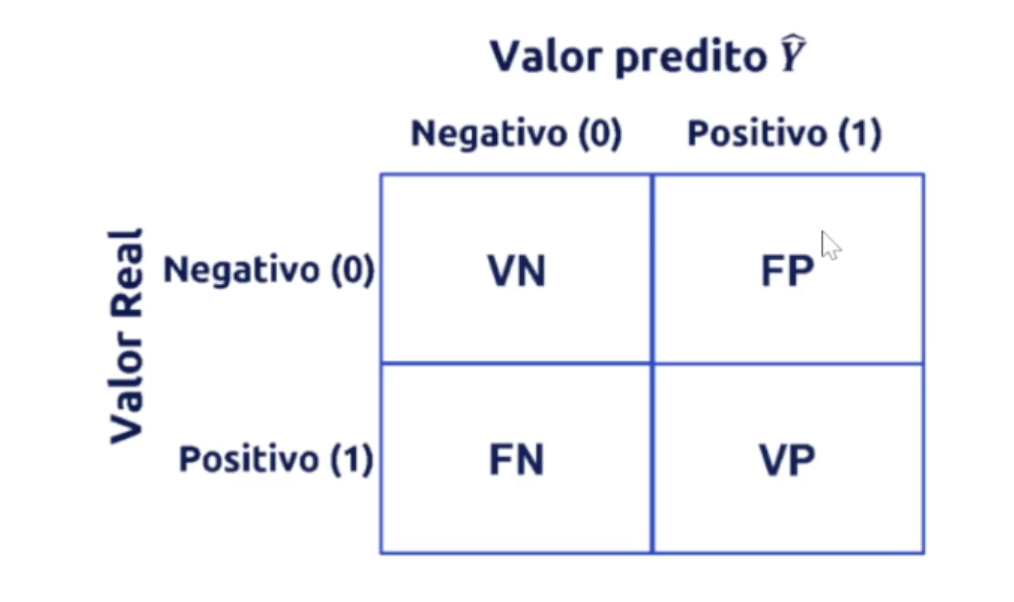

KNN

In [96]:
evaluate_classification(knn_best, X_test, y_test)

Acurácia:  0.9519583095839101
Recall:  0.9055239642567019
Precisão:  0.998477248298101
F1-Score:  0.9497316179602965


In [97]:
pred_knn = knn_best.predict(X_test)

[[12235    17]
 [ 1163 11147]]


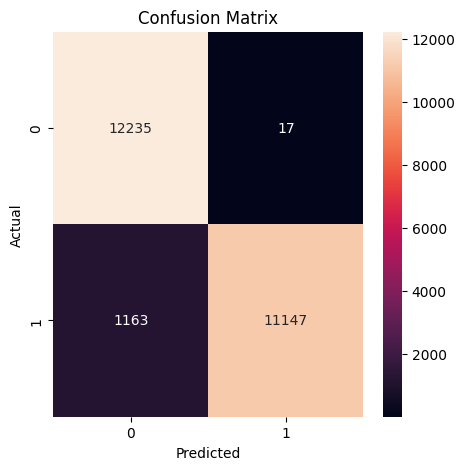

In [98]:
print(confusion_matrix(y_test, pred_knn))
confusion_matrix_visualization(y_test, pred_knn)

Random Forest

In [101]:
evaluate_classification(rf_best, X_test, y_test)

Acurácia:  0.9898623890562658
Recall:  0.9992688870836718
Precisão:  0.980862770114026
F1-Score:  0.9899802824836023


In [102]:
pred_rf = rf_best.predict(X_test)

[[12012   240]
 [    9 12301]]


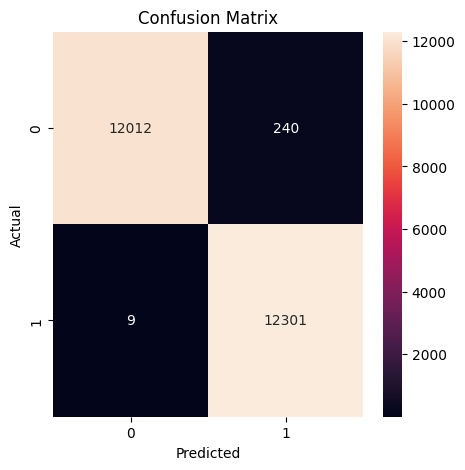

In [103]:
print(confusion_matrix(y_test, pred_rf))
confusion_matrix_visualization(y_test, pred_rf)

In [104]:
feature_imp_rf = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_imp_rf

PLAN_PREGNANCY       0.132000
FOOD_INSECURITY      0.110480
CONN_SEWER_NET       0.092027
HOUSING_STATUS       0.088265
FAM_PLANNING         0.083386
HAS_FRU_TREE         0.049854
LEVEL_SCHOOLING      0.048442
IS_HEAD_FAMILY       0.037713
NUM_RES_HOUSEHOLD    0.036036
WATER_TREATMENT      0.034480
CONS_ALCOHOL         0.028014
NUM_PREGNANCIES      0.027337
SMOKER               0.026610
HAS_PREG_RISK        0.026343
FAM_INCOME           0.025236
BLOOD_GROUP          0.021122
AGE                  0.021025
HAS_VEG_GARDEN       0.019619
HAS_FAM_INCOME       0.017777
MARITAL_STATUS       0.016629
NUM_LIV_CHILDREN     0.016468
NUM_ABORTIONS        0.013980
TET_VACCINE          0.011675
RH_FACTOR            0.009873
TYPE_HOUSE           0.005611
dtype: float64

Decision Tree

In [105]:
evaluate_classification(dt_best, X_test, y_test)

Acurácia:  0.9757348750101783
Recall:  0.9705930138099106
Precisão:  0.9807913314726646
F1-Score:  0.975665523436224


In [106]:
pred_dt = dt_best.predict(X_test)

[[12018   234]
 [  362 11948]]


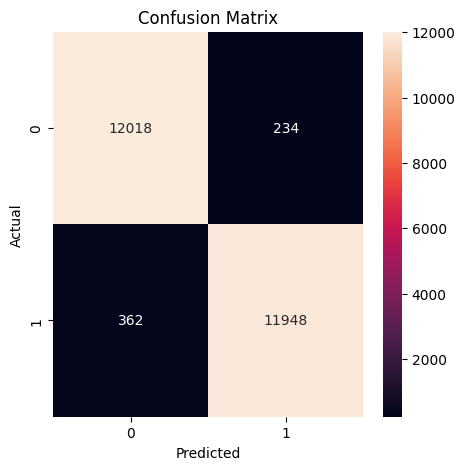

In [107]:
print(confusion_matrix(y_test, pred_dt))
confusion_matrix_visualization(y_test, pred_dt)

In [108]:
feature_imp_dt = pd.Series(dt_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_imp_dt

FOOD_INSECURITY      0.317119
FAM_PLANNING         0.123374
PLAN_PREGNANCY       0.117316
CONN_SEWER_NET       0.077476
HAS_FRU_TREE         0.040992
HOUSING_STATUS       0.038925
SMOKER               0.038049
LEVEL_SCHOOLING      0.031053
HAS_PREG_RISK        0.029018
IS_HEAD_FAMILY       0.025154
NUM_RES_HOUSEHOLD    0.022897
WATER_TREATMENT      0.021543
NUM_PREGNANCIES      0.021222
AGE                  0.016055
CONS_ALCOHOL         0.012091
FAM_INCOME           0.011465
TET_VACCINE          0.009453
NUM_LIV_CHILDREN     0.008588
BLOOD_GROUP          0.008409
MARITAL_STATUS       0.007620
TYPE_HOUSE           0.006079
HAS_VEG_GARDEN       0.004599
NUM_ABORTIONS        0.004213
RH_FACTOR            0.004094
HAS_FAM_INCOME       0.003195
dtype: float64

Logistic Regression

In [109]:
evaluate_classification(lr_best, X_test, y_test)

Acurácia:  0.6159107564530576
Recall:  0.6001624695369618
Precisão:  0.6208403361344538
F1-Score:  0.610326311441553


In [110]:
pred_lr = lr_best.predict(X_test)

[[7740 4512]
 [4922 7388]]


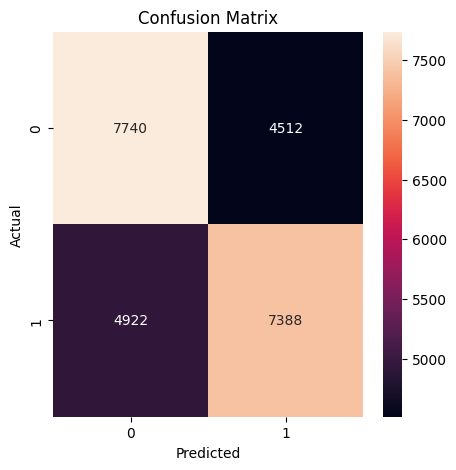

In [111]:
print(confusion_matrix(y_test, pred_lr))
confusion_matrix_visualization(y_test, pred_lr)

XGBoost

In [113]:
evaluate_classification(xgb_best, X_test, y_test)

Acurácia:  0.9905138018076703
Recall:  0.9992688870836718
Precisão:  0.9821157684630738
F1-Score:  0.9906180793235353


In [114]:
pred_xgb = xgb_best.predict(X_test)

[[12028   224]
 [    9 12301]]


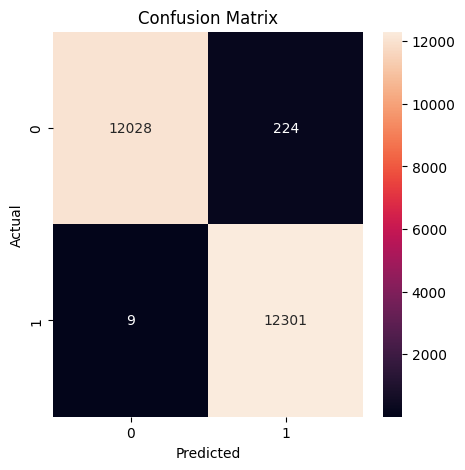

In [115]:
print(confusion_matrix(y_test, pred_xgb))
confusion_matrix_visualization(y_test, pred_xgb)

In [116]:
feature_imp_xgb = pd.Series(xgb_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_imp_xgb

FOOD_INSECURITY      0.219883
PLAN_PREGNANCY       0.191005
SMOKER               0.083501
CONN_SEWER_NET       0.076730
HAS_FRU_TREE         0.069966
FAM_PLANNING         0.055979
HOUSING_STATUS       0.036391
HAS_PREG_RISK        0.032382
HAS_VEG_GARDEN       0.030104
CONS_ALCOHOL         0.029983
IS_HEAD_FAMILY       0.028614
TYPE_HOUSE           0.023794
WATER_TREATMENT      0.018291
TET_VACCINE          0.018229
NUM_RES_HOUSEHOLD    0.014894
LEVEL_SCHOOLING      0.010809
NUM_PREGNANCIES      0.010257
HAS_FAM_INCOME       0.008404
FAM_INCOME           0.007016
BLOOD_GROUP          0.006041
NUM_LIV_CHILDREN     0.005787
AGE                  0.005749
NUM_ABORTIONS        0.005600
MARITAL_STATUS       0.005526
RH_FACTOR            0.005067
dtype: float32

# 4.0 Regression

##### 4.1 Dividing dataset

In [17]:
X_r = df_balanced.drop(columns=["AGE"])

y_r = df_balanced["AGE"]

In [18]:
print(y_r.head(2))
print("\n")

X_r.head(2)

0    25.0
1    25.0
Name: AGE, dtype: float64




,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0


In [19]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.3, random_state=42)

#### 4.2 Training models

##### 4.2.1 Testing Hiperparams

In [20]:
knn_r = KNeighborsRegressor()

rf_r = RandomForestRegressor(random_state=42)

dt_r = DecisionTreeRegressor(random_state=42)

lr_r = LinearRegression()

xgb_r = XGBRegressor(random_state=42)

In [22]:
def safe_mape(y_true, y_pred, threshold=1e-2):
    # Ignora valores muito pequenos em y_true, substituindo por NaN onde necessário
    mask = np.abs(y_true) >= threshold
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    
    # Calcula o MAPE usando apenas os valores que passaram pelo filtro
    return np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100 if len(y_true_filtered) > 0 else np.nan

In [ ]:
# Definindo os hiperparâmetros para variação
n_neighbors_list_knn_r = [12, 13, 14, 15, 16]
weights_list_knn_r = ["uniform", "distance"]

# Lista para armazenar resultados
regression_results = []

def train_knn_regressor_models(X_train, y_train, X_test, y_test):

    for n_neighbors in n_neighbors_list_knn_r:
        for weight in weights_list_knn_r:
            # Cria o modelo KNN Regressor com os parâmetros específicos
            knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight)
            
            # Treina o modelo
            knn_regressor.fit(X_train, y_train)
            
            # Faz previsões no conjunto de teste
            y_pred = knn_regressor.predict(X_test)

            
            
            # Calcula as métricas
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mape = safe_mape(y_test, y_pred)
            rmse = np.sqrt(mse)
            
            # Armazena os resultados
            regression_results.append({
                "n_neighbors": n_neighbors,
                "weights": weight,
                "r2_score": r2,
                "mae": mae,
                "mse": mse,
                "mape": mape,
                "rmse": rmse
            })
            
            # Exibe as métricas para cada combinação de parâmetros
            print(f"Modelo com n_neighbors={n_neighbors}, weights={weight} -> "
                  f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results

In [164]:
# Supondo que você tenha definido X_train, X_test, y_train, y_test
results_knn_r = train_knn_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com n_neighbors=9, weights=uniform -> R² Score: 0.5046, MAE: 1.6084, MSE: 10.1984, MAPE: 6.7166, RMSE: 3.1935
Modelo com n_neighbors=9, weights=distance -> R² Score: 0.5226, MAE: 1.5438, MSE: 9.8266, MAPE: 6.4448, RMSE: 3.1347
Modelo com n_neighbors=10, weights=uniform -> R² Score: 0.5064, MAE: 1.6072, MSE: 10.1613, MAPE: 6.7140, RMSE: 3.1877
Modelo com n_neighbors=10, weights=distance -> R² Score: 0.5244, MAE: 1.5412, MSE: 9.7900, MAPE: 6.4369, RMSE: 3.1289
Modelo com n_neighbors=11, weights=uniform -> R² Score: 0.5059, MAE: 1.6089, MSE: 10.1714, MAPE: 6.7261, RMSE: 3.1893
Modelo com n_neighbors=11, weights=distance -> R² Score: 0.5243, MAE: 1.5418, MSE: 9.7921, MAPE: 6.4423, RMSE: 3.1292
Modelo com n_neighbors=12, weights=uniform -> R² Score: 0.5071, MAE: 1.6103, MSE: 10.1475, MAPE: 6.7349, RMSE: 3.1855
Modelo com n_neighbors=12, weights=distance -> R² Score: 0.5256, MAE: 1.5416, MSE: 9.7658, MAPE: 6.4435, RMSE: 3.1250
Modelo com n_neighbors=13, weights=uniform -> R² Score: 0.

**The best KNN Regressor is n_neighbors=15 and weights=distance**

In [1]:
# Definindo os hiperparâmetros para variação
n_estimators_list_rf_r = [1000, 700, 300]
max_depth_list_rf_r = [20, 15, 30]

# Lista para armazenar resultados
regression_results_rf_r = []

def train_rf_regressor_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_rf_r:
        for max_depth in max_depth_list_rf_r:
            # Cria o modelo Random Forest Regressor com os parâmetros específicos
            rf_regressor = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                random_state=42
            )
            
            # Treina o modelo
            rf_regressor.fit(X_train, y_train)
            
            # Faz previsões no conjunto de teste
            y_pred = rf_regressor.predict(X_test)
            
            # Calcula as métricas
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            
            # Calcula o MAPE usando a função segura
            mape = safe_mape(y_test, y_pred)

            # Armazena os resultados
            regression_results_rf_r.append({
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "r2_score": r2,
                "mae": mae,
                "mse": mse,
                "mape": mape,
                "rmse": rmse
            })
            
            # Exibe as métricas para cada combinação de parâmetros
            print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth} -> "
                  f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_rf_r

In [ ]:
# Exemplo de uso
results_rf_r = train_rf_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

**The best Random Forest Regressor is n_estimators=300 and max_depth=20**

In [174]:
# Lista de valores para o hiperparâmetro max_depth
max_depth_list_dt_r = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# Lista para armazenar resultados
regression_results_dt_r = []


def train_dt_regressor_models(X_train, y_train, X_test, y_test):
    for max_depth in max_depth_list_dt_r:
        # Cria o modelo Decision Tree Regressor com o valor específico de max_depth
        dt_regressor = DecisionTreeRegressor(
            max_depth=max_depth,
            random_state=42
        )
        
        # Treina o modelo
        dt_regressor.fit(X_train, y_train)
        
        # Faz previsões no conjunto de teste
        y_pred = dt_regressor.predict(X_test)
        
        # Calcula as métricas
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Calcula o MAPE usando a função segura
        mape = safe_mape(y_test, y_pred)

        # Armazena os resultados
        regression_results_dt_r.append({
            "max_depth": max_depth,
            "r2_score": r2,
            "mae": mae,
            "mse": mse,
            "mape": mape,
            "rmse": rmse
        })
        
        # Exibe as métricas para cada valor de max_depth
        print(f"Modelo com max_depth={max_depth} -> "
              f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_dt_r

In [ ]:

results_dt_r = train_dt_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com max_depth=11 -> R² Score: 0.3491, MAE: 2.2496, MSE: 13.3996, MAPE: 9.3564, RMSE: 3.6605
Modelo com max_depth=12 -> R² Score: 0.3628, MAE: 2.1476, MSE: 13.1177, MAPE: 8.9433, RMSE: 3.6218
Modelo com max_depth=13 -> R² Score: 0.3549, MAE: 2.1000, MSE: 13.2799, MAPE: 8.7449, RMSE: 3.6442
Modelo com max_depth=14 -> R² Score: 0.3328, MAE: 2.0544, MSE: 13.7345, MAPE: 8.5523, RMSE: 3.7060
Modelo com max_depth=15 -> R² Score: 0.3194, MAE: 2.0082, MSE: 14.0115, MAPE: 8.3580, RMSE: 3.7432
Modelo com max_depth=16 -> R² Score: 0.2889, MAE: 2.0088, MSE: 14.6374, MAPE: 8.3405, RMSE: 3.8259
Modelo com max_depth=17 -> R² Score: 0.2690, MAE: 1.9943, MSE: 15.0482, MAPE: 8.2701, RMSE: 3.8792
Modelo com max_depth=18 -> R² Score: 0.2379, MAE: 2.0075, MSE: 15.6876, MAPE: 8.3237, RMSE: 3.9608
Modelo com max_depth=19 -> R² Score: 0.2098, MAE: 2.0170, MSE: 16.2673, MAPE: 8.3661, RMSE: 4.0333
Modelo com max_depth=20 -> R² Score: 0.1918, MAE: 2.0232, MSE: 16.6364, MAPE: 8.3813, RMSE: 4.0788
Modelo com

**The best Decision Tree Regressor is max_depth=12**

In [ ]:
# Lista de valores para os hiperparâmetros
fit_intercept_list = [True, False]

# Lista para armazenar resultados
regression_results_lr_r = []

def train_lr_regressor_models(X_train, y_train, X_test, y_test):
    for fit_intercept in fit_intercept_list:
        # Cria o modelo Linear Regression com o valor específico de fit_intercept
        lr_model = LinearRegression(
            fit_intercept=fit_intercept
        )
        
        # Treina o modelo
        lr_model.fit(X_train, y_train)
        
        # Faz previsões no conjunto de teste
        y_pred = lr_model.predict(X_test)
        
        # Calcula as métricas
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Calcula o MAPE usando a função segura
        mape = safe_mape(y_test, y_pred)

        # Armazena os resultados
        regression_results_lr_r.append({
            "fit_intercept": fit_intercept,
            "r2_score": r2,
            "mae": mae,
            "mse": mse,
            "mape": mape,
            "rmse": rmse
        })
        
        # Exibe as métricas para cada configuração de fit_intercept
        print(f"Modelo com fit_intercept={fit_intercept} -> "
              f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_lr_r

In [156]:
results_lr_r = train_lr_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com fit_intercept=True -> R² Score: 0.0497, MAE: 2.9125, MSE: 19.5632, MAPE: 12.3950%, RMSE: 4.4230
Modelo com fit_intercept=False -> R² Score: -0.1612, MAE: 3.3550, MSE: 23.9036, MAPE: 14.0797%, RMSE: 4.8891


**The best Linear Regressor is fit_intercept=True**

In [181]:
# Definindo os hiperparâmetros para variação
n_estimators_list_xgb_r = [200, 250, 700, 1000]
max_depth_list_xgb_r = [10, 15]
learning_rate_list_xgb_r = [0.01, 0.05, 0.07]

# Lista para armazenar resultados
regression_results_xgb_r = []

def train_xgb_regressor_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_xgb_r:
        for max_depth in max_depth_list_xgb_r:
            for learning_rate in learning_rate_list_xgb_r:
                # Cria o modelo XGBRegressor com os parâmetros específicos
                xgb_regressor = XGBRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                    random_state=42
                )
                
                # Treina o modelo
                xgb_regressor.fit(X_train, y_train)
                
                # Faz previsões no conjunto de teste
                y_pred = xgb_regressor.predict(X_test)
                
                # Calcula as métricas
                r2 = r2_score(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                
                # Calcula o MAPE usando a função segura
                mape = safe_mape(y_test, y_pred)

                # Armazena os resultados
                regression_results_xgb_r.append({
                    "n_estimators": n_estimators,
                    "max_depth": max_depth,
                    "learning_rate": learning_rate,
                    "r2_score": r2,
                    "mae": mae,
                    "mse": mse,
                    "mape": mape,
                    "rmse": rmse
                })
                
                # Exibe as métricas para cada combinação de parâmetros
                print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate} -> "
                      f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_xgb_r

In [ ]:
results_xgb_r = train_xgb_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com n_estimators=200, max_depth=10, learning_rate=0.01 -> R² Score: 0.4912, MAE: 2.0201, MSE: 10.4735, MAPE: 8.5239, RMSE: 3.2363
Modelo com n_estimators=200, max_depth=10, learning_rate=0.05 -> R² Score: 0.5691, MAE: 1.7282, MSE: 8.8703, MAPE: 7.2155, RMSE: 2.9783
Modelo com n_estimators=200, max_depth=10, learning_rate=0.07 -> R² Score: 0.5699, MAE: 1.7025, MSE: 8.8537, MAPE: 7.1117, RMSE: 2.9755
Modelo com n_estimators=200, max_depth=15, learning_rate=0.01 -> R² Score: 0.5302, MAE: 1.7877, MSE: 9.6720, MAPE: 7.5036, RMSE: 3.1100
Modelo com n_estimators=200, max_depth=15, learning_rate=0.05 -> R² Score: 0.5390, MAE: 1.6594, MSE: 9.4895, MAPE: 6.8956, RMSE: 3.0805
Modelo com n_estimators=200, max_depth=15, learning_rate=0.07 -> R² Score: 0.5268, MAE: 1.6758, MSE: 9.7406, MAPE: 6.9592, RMSE: 3.1210
Modelo com n_estimators=250, max_depth=10, learning_rate=0.01 -> R² Score: 0.5151, MAE: 1.9549, MSE: 9.9820, MAPE: 8.2376, RMSE: 3.1594
Modelo com n_estimators=250, max_depth=10, lear

**The best XGBoost Regressor is n_estimators=200, max_depth=10 and learning_rate=0.05**

##### 4.2.2 Training the models with the best hiperparams

In [ ]:
knn_r_best = KNeighborsRegressor()

rf_r_best = RandomForestRegressor(random_state=42)

dt_r_best = DecisionTreeRegressor(random_state=42)

lr_r_best = LinearRegression()

xgb_r_best = XGBRegressor(random_state=42)